[# **Topic 3: COVID 19 Healthy Diet**](https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_kcal_Data.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Step 1: Load the dataset
file_path = 'drive/My Drive/ASM/Assignment 2/Food_Supply_kcal_Data.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# Drop rows with missing values
data = data.dropna()

# Normalize food product consumption by population
food_columns = data.columns[1:24]  # All columns except Country, Obesity, Undernourished, Confirmed, Deaths, Recovered, Active, Population
for col in food_columns:
    data[col] = data[col] / data['Population']

# Rename columns to remove spaces and hyphens
data.columns = [col.replace(' ', '_').replace('-', '_') for col in data.columns]

# Step 3: ANOVA Analysis
# One-way ANOVA to analyze the impact of different food product categories on obesity levels
anova_results = {}
for col in food_columns:
    model = ols(f'Obesity ~ {col}', data=data).fit()
    anova_table = anova_lm(model, typ=2)
    anova_results[col] = anova_table

# Display ANOVA results
for col, table in anova_results.items():
    print(f"ANOVA Table for {col}:\n")
    print(table)
    print('\n')




ANOVA Table for Alcoholic_Beverages:

                           sum_sq     df         F   PR(>F)
Alcoholic_Beverages    434.227611    1.0  4.914302  0.02812
Residual             13430.717324  152.0       NaN      NaN


ANOVA Table for Animal_Products:

                       sum_sq     df         F    PR(>F)
Animal_Products    694.496068    1.0  8.015171  0.005267
Residual         13170.448867  152.0       NaN       NaN


ANOVA Table for Animal_fats:

                   sum_sq     df          F    PR(>F)
Animal_fats   1198.435706    1.0  14.381407  0.000215
Residual     12666.509229  152.0        NaN       NaN


ANOVA Table for Aquatic_Products:

                        sum_sq     df         F    PR(>F)
Aquatic_Products    701.160790    1.0  8.096186  0.005048
Residual          13163.784145  152.0       NaN       NaN


ANOVA Table for Cereals_Excluding_Beer:

                              sum_sq     df         F    PR(>F)
Cereals_Excluding_Beer    190.110483    1.0  2.113137  0.148101

 [# **Topic 4: Predicting Yearly Amount Spent by E-commerce Customers**](https://www.kaggle.com/datasets/iabdulw/ecommerce-customer-data)

                         \tEmail  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0         835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1       4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3     1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   

   Time on App  Time on Website  Length of Membership  Yearly Amount Spent  
0        12.66            39.58                  4.08               587.95  
1        11.11            37.27                  2.66               392.20  
2        11.33            37.11                  4.10               487.55  
3        13.72            36.7

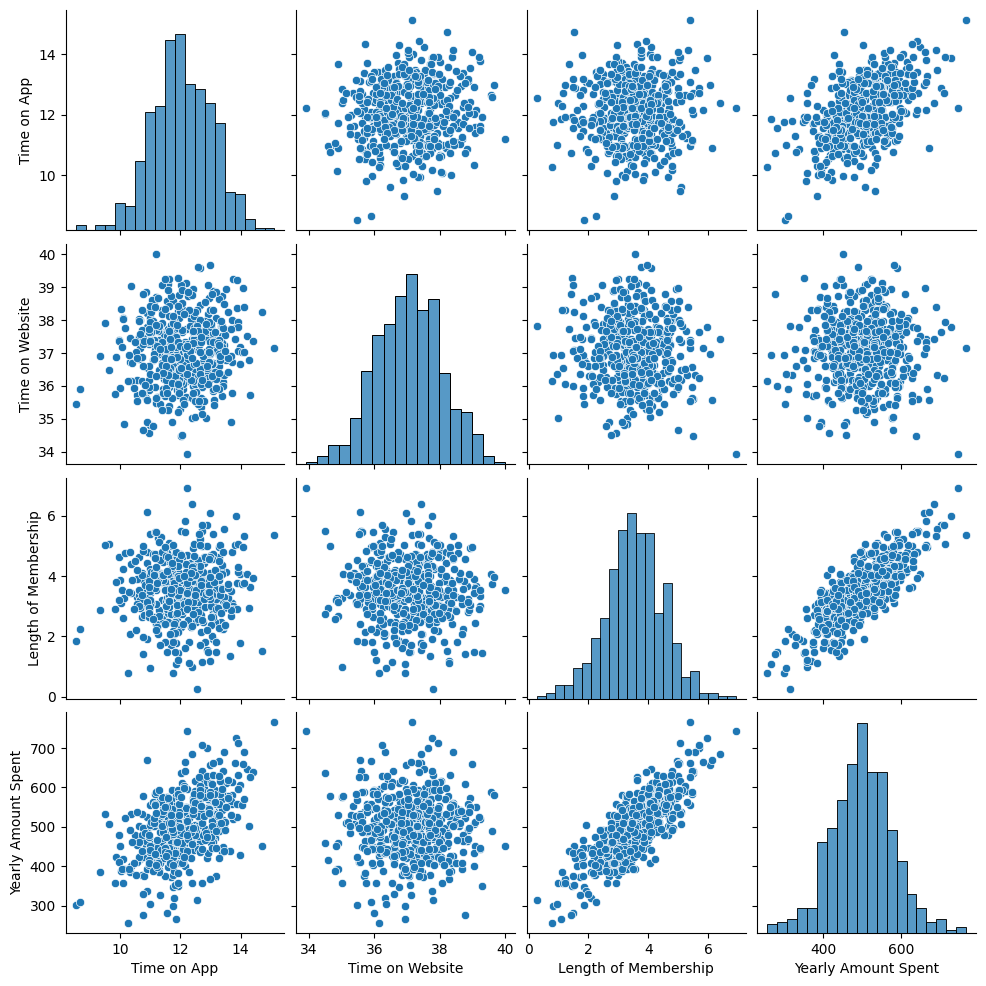

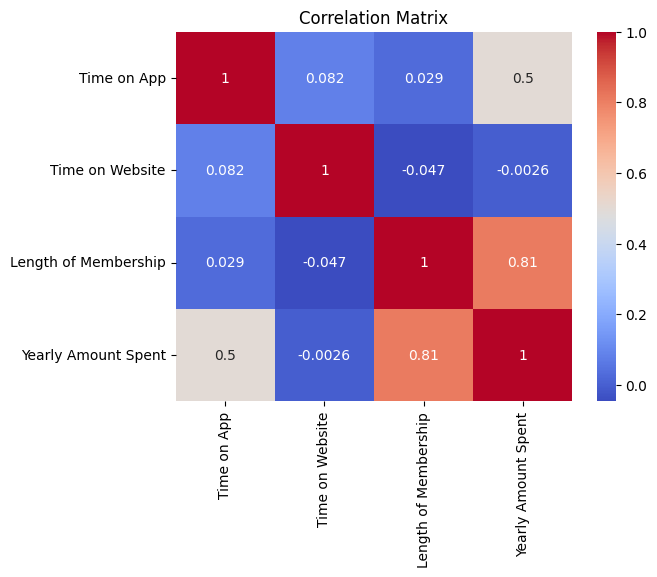

Mean Squared Error: 806.83
Root Mean Squared Error: 28.40
R^2 Score: 0.84


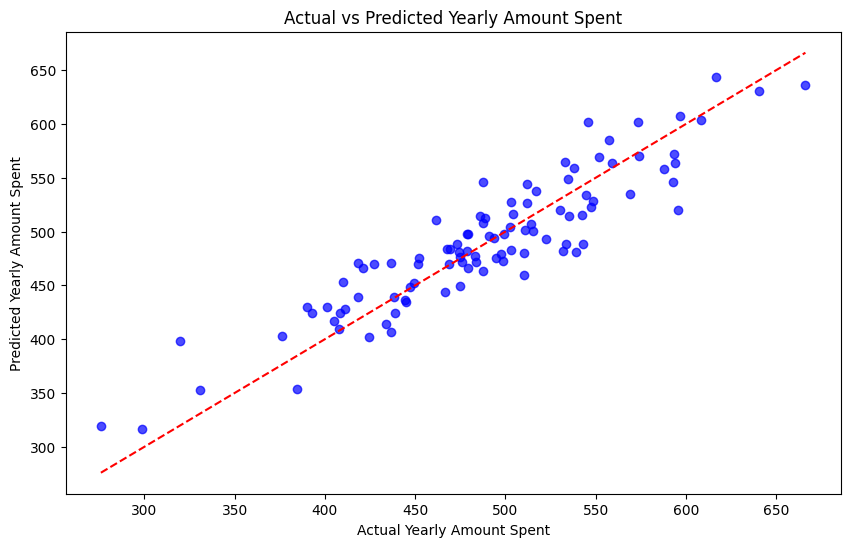

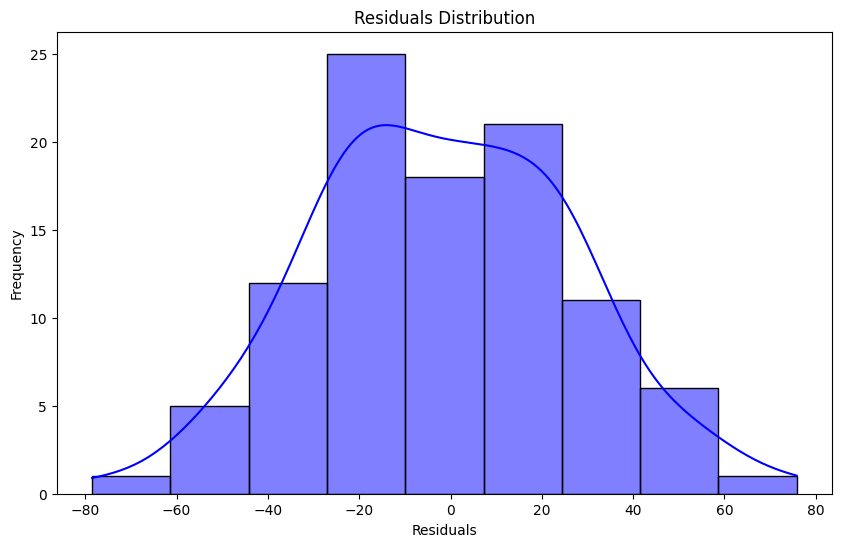

                      Coefficient
Time on App             37.992743
Time on Website          0.534710
Length of Membership    62.769980

Model Interpretation:
For each additional minute spent on the app, the yearly amount spent increases by $37.99.
For each additional minute spent on the website, the yearly amount spent increases by $0.53.
For each additional year of membership, the yearly amount spent increases by $62.77.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'drive/My Drive/ASM/Assignment 2/e-commerce-data.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Initial exploration
print(data.head())
print(data.info())
print(data.describe())

# Preprocess the data
# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Drop columns that are not useful for prediction
data = data.drop(columns=['Email', 'Address', 'Avatar'])

# Check for missing values
print(data.isnull().sum())

# Visualize the relationships between features and the target variable
sns.pairplot(data)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Define the features (independent variables) and the target (dependent variable)
X = data[['Time on App', 'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.show()

# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='b')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Interpretation of the model
print("\nModel Interpretation:")
print(f"For each additional minute spent on the app, the yearly amount spent increases by ${coefficients.loc['Time on App'].values[0]:.2f}.")
print(f"For each additional minute spent on the website, the yearly amount spent increases by ${coefficients.loc['Time on Website'].values[0]:.2f}.")
print(f"For each additional year of membership, the yearly amount spent increases by ${coefficients.loc['Length of Membership'].values[0]:.2f}.")
